# MSDS 7331 Data Mining Lab 1
Profesor: Dr. Jake Drew  
Team: Steven Hayden, Josephine MacDaniel, Afreen Siddiqui, & Eduardo Cantu

In [101]:
import pandas as pd
import numpy as np
import seaborn as seaborn
import matplotlib.pyplot as plt
import matplotlib as mp1
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

## Business Understanding


## Data Meaning Type

## Data Quality

In [82]:


# read in the data from 2015 and 2016
Accident_df = pd.read_csv('https://raw.githubusercontent.com/ecantu75/DataMining_Lab1/master/Data/accident_2016.csv',low_memory=False)

#Accident_df = Accident_df.drop(columns='Unnamed: 0')
#Data frame description 
#Accident_df.head()
Accident_df.shape
#Accident_df.info()



(34439, 71)

In [83]:
#check for duplicate recoreds

Accident_df['consecutive_number'].value_counts().max()



1

In [84]:
# Add a new Feature
Accident_df['Fatalities_ratio'] = Accident_df.number_of_fatalities/(Accident_df.number_of_persons_not_in_motor_vehicles_in_transport_mvit + Accident_df.number_of_persons_in_motor_vehicles_in_transport_mvit)

## Simple Statistics

37461 death in this data set. 43% of people involved in a accident die 

In [ ]:
# Number of people who died in a car accident based on the given data for 2016 
percentDeath = sum(Accident_df.number_of_fatalities)/(sum(Accident_df.number_of_persons_not_in_motor_vehicles_in_transport_mvit)+sum(Accident_df.number_of_persons_in_motor_vehicles_in_transport_mvit)) * 100
percentDeath = np.round(percentDeath, decimals=2)
Deaths = sum(Accident_df.number_of_fatalities)
print('The number of people who died in a car accident in 2016 is', Deaths ,'With' ,percentDeath,'% fatalities rate for all people involved.')



In [ ]:
# Monthly data for accidents
fatility_counts = pd.crosstab([Accident_df['month_of_crash']], Accident_df.number_of_fatalities)
fatility_counts.plot(kind='bar', stacked=True, color=['green'], legend=False)

In [ ]:
#top 4 month of accidents
Accident_df.groupby(['month_of_crash']).aggregate({'number_of_fatalities':sum}).sort_values('number_of_fatalities',ascending=False).head(4)

In [ ]:
# Monthly data for accidents
acci_count=Accident_df.groupby(['month_of_crash']).count().reset_index()
acci_count.rename(columns={'Unnamed: 0': 'accident_count'}, inplace=True)
#type(acci_count)
acci_count = acci_count.filter(['month_of_crash', 'accident_count'], axis=1)
acci_count_sorted = acci_count.sort_values('accident_count',ascending=False)
acci_count_sorted.head(4)


In [ ]:
# Monthly data for accidents
acci_count_sorted.plot.bar(x='month_of_crash', y='accident_count', rot=0)

In [ ]:
#state wise analysis for fatal accidents:
acci_count_bystate=Accident_df.groupby(['state_name']).count().reset_index()
acci_count_bystate.rename(columns={'Unnamed: 0': 'accident_count_bystate'}, inplace=True)
acci_count_bystate_sorted = acci_count_bystate.sort_values('accident_count_bystate',ascending=False)
acci_count_bystate_sorted = acci_count_bystate_sorted.filter(['state_name', 'accident_count_bystate'], axis=1)
acci_count_bystate_sorted.head(10)

In [ ]:
#state wise analysis for fatal accidents:
acci_count_bystate_sorted.plot.bar(x='state_name', y='accident_count_bystate', stacked=True, color=['blue'])

In [ ]:
#Hour of accidents
acci_count_bytime=Accident_df.groupby(['hour_of_crash']).count().reset_index()
acci_count_bytime
acci_count_bytime.rename(columns={'Unnamed: 0': 'accident_count_bytime'}, inplace=True)
acci_count_bytime_sorted = acci_count_bytime.sort_values('accident_count_bytime',ascending=False)
acci_count_bytime_sorted = acci_count_bytime_sorted.filter(['hour_of_crash','accident_count_bytime'], axis=1)
acci_count_bytime_sorted.head(10)

In [ ]:
#Hours of accidents
acci_count_bytime_sorted = acci_count_bytime_sorted.loc[acci_count_bytime_sorted['hour_of_crash'] != 99]
plt.plot( 'hour_of_crash', 'accident_count_bytime', data=acci_count_bytime_sorted, marker='o', color='mediumvioletred')
plt.show()


In [ ]:
#Location of accident 
acci_count_byloc=Accident_df.groupby(['route_signing_name']).count().reset_index()
acci_count_byloc
acci_count_byloc.rename(columns={'Unnamed: 0': 'accident_count_byloc'}, inplace=True)
acci_count_byloc_sorted = acci_count_byloc.sort_values('accident_count_byloc',ascending=False)
acci_count_byloc_sorted = acci_count_byloc_sorted.filter(['route_signing_name','accident_count_byloc'], axis=1)
acci_count_byloc_sorted.head(10)

In [ ]:
#Location of accident
acci_count_byloc_sorted.plot.bar(x='route_signing_name', y='accident_count_byloc', stacked=True, rot=45)

In [ ]:
#Type of Collision which causes fatal accidents
acci_count_bytype=Accident_df.groupby(['manner_of_collision_name']).count().reset_index()
acci_count_bytype
acci_count_bytype.rename(columns={'Unnamed: 0': 'accident_count_bytype'}, inplace=True)
acci_count_bytype_sorted = acci_count_bytype.sort_values('accident_count_bytype',ascending=False)
acci_count_bytype_sorted = acci_count_bytype_sorted.filter(['manner_of_collision_name','accident_count_bytype'], axis=1)
acci_count_bytype_sorted.head(10)

In [ ]:
#level of light that existed at the time of the crash as indicated in the case material.
acci_count_bylight=Accident_df.groupby(['light_condition_name']).count().reset_index()
acci_count_bylight
acci_count_bylight.rename(columns={'Unnamed: 0': 'accident_count_bylight'}, inplace=True)
acci_count_bylight_sorted = acci_count_bylight.sort_values('accident_count_bylight',ascending=False)
acci_count_bylight_sorted = acci_count_bylight_sorted.filter(['light_condition_name','accident_count_bylight'], axis=1)
acci_count_bylight_sorted.head(10)

In [ ]:
#level of light that existed at the time of the crash as indicated in the case material.
acci_count_bylight=Accident_df.groupby(['light_condition_name']).count().reset_index()
acci_count_bylight
acci_count_bylight.rename(columns={'Unnamed: 0': 'accident_count_bylight'}, inplace=True)
acci_count_bylight_sorted = acci_count_bylight.sort_values('accident_count_bylight',ascending=False)
acci_count_bylight_sorted.head(10)
acci_count_bylight_sorted.plot.pie(y='accident_count_bylight', figsize=(8, 8))

In [ ]:
#Weather conditions during accidents
acci_count_byatm=Accident_df.groupby(['atmospheric_conditions_name']).count().reset_index()
acci_count_byatm
acci_count_byatm.rename(columns={'Unnamed: 0': 'accident_count_byatm'}, inplace=True)
acci_count_byatm_sorted = acci_count_byatm.sort_values('accident_count_byatm',ascending=False)
acci_count_byatm_sorted = acci_count_byatm_sorted.filter(['atmospheric_conditions_name','accident_count_byatm'], axis=1)
acci_count_byatm_sorted.head(10)

In [ ]:
#Weather conditions during accidents
acci_count_byatm_sorted.plot.bar(x='atmospheric_conditions_name', y='accident_count_byatm', stacked=True, rot=45)

## Visualize Attributes

In [ ]:
#simple descriptive statistics for atmospheric conditions 
Accident_df[['number_of_fatalities','atmospheric_conditions_1_name']].groupby('atmospheric_conditions_1_name').describe()

In [ ]:
#simple descriptive statistics for light condition
Accident_df[['number_of_fatalities','light_condition_name']].groupby('light_condition_name').describe()

The correlation heat map is great for finding relationship with many attributes 

In [ ]:
# plot the correlation matrix using seaborn
cmap = seaborn.diverging_palette(200, 1, as_cmap=True) # Assign color for table 
seaborn.set(style="ticks") # one of the many styles to plot using

f, ax = plt.subplots(figsize=(35, 35))

seaborn.heatmap(Accident_df.corr(), cmap=cmap, annot=True)

f.tight_layout()

In [ ]:
#Initiate boxplot 
ax = Accident_df.boxplot(column='consecutive_number', by = 'atmospheric_conditions_1_name')
# clean up titles
ax.set_xscale
ax.set_title('')
ax.set_xlabel('')
ax.set_ylabel('')
#
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right');

In [ ]:
#Creates a new column to identify if there was daylight at the time of the accident. Dawn and Dusk were indicated as daylight.
#This effective turns the daylight condition column into a binary field to be used later in the violin graph
Accident_df['Day_Time_Yes_No'] = np.where(Accident_df['light_condition'] == 1 , 'yes', 'no')
Accident_df['Day_Time_Yes_No'] = np.where(Accident_df['light_condition'] == 4 , 'yes', Accident_df['Day_Time_Yes_No'])
Accident_df['Day_Time_Yes_No'] = np.where(Accident_df['light_condition'] == 5 , 'yes', Accident_df['Day_Time_Yes_No'])
#Treats unknown and not reported as null in the data set. This is done because we cannot gain any insight of the lighting condition from these records. 
Accident_df['Day_Time_Yes_No'] = np.where(Accident_df['light_condition'] == 8 , np.nan , Accident_df['Day_Time_Yes_No'])
Accident_df['Day_Time_Yes_No'] = np.where(Accident_df['light_condition'] == 9 , np.nan , Accident_df['Day_Time_Yes_No'])

#count and summary of new light condition field 
Accident_df.groupby(['light_condition','light_condition_name','Day_Time_Yes_No']).size()

In [ ]:

#adjust the size of the violin plot
f, ax = plt.subplots(figsize=(30, 30))

seaborn.violinplot(x="atmospheric_conditions_1_name", y="consecutive_number", hue="Day_Time_Yes_No", data=Accident_df, 
               split=True, inner="quart")

## Explore Joint Attributes

Relationship between the number of accidents and the weather conditions. The Attributes are:  

    * Fatalities_ratio
    * number_of_fatalities 
    * total_number_of_persons_involved
    * accident_count
    
    Each row or observation is car accident. It provides the conditions in which the accident occured. It captures the number of fatalities, number of people involved in the accident, the time that took the first reponders to get to the area and then to the hospital. This statistics are provided by state, highway it happend.
    One of the relations that can be made is highway vs number of accidents. Does a particular highway presents a higer risk  than than others.

To review the attributes there is no need to have the entire data set. Below the attributes that are not needed get droped. This code is an adaptation from the 'DataMiningNotebooks'

In [87]:
#Accident_df.info()
Accident_forScatter=Accident_df.copy()

    # 'state_name',

# 1. Remove attributes that just arent useful for us
for col in ['Unnamed: 0',
             'state_number',
             'consecutive_number',
             'county',
             'city',
             'day_of_crash',
             'month_of_crash',
             'year_of_crash',
             'day_of_week',
             'hour_of_crash',
             'minute_of_crash',
             'national_highway_system',
             'land_use',
             'land_use_name',
             'functional_system',
             'functional_system_name',
             'ownership',
             'ownership_name',
             'route_signing',
             'route_signing_name',
             'trafficway_identifier',
             'trafficway_identifier_2',
             'latitude',
             'longitude',
             'special_jurisdiction',
             'special_jurisdiction_name',
             'first_harmful_event',
             'first_harmful_event_name',
             'manner_of_collision',
             'manner_of_collision_name',
             'relation_to_junction_within_interchange_area',
             'relation_to_junction_specific_location',
             'relation_to_junction_specific_location_name',
             'type_of_intersection',
             'work_zone',
             'relation_to_trafficway',
             'relation_to_trafficway_name',
             'light_condition',
             'light_condition_name',
             'atmospheric_conditions_1',
             'atmospheric_conditions_1_name',
             'atmospheric_conditions_2',
             'atmospheric_conditions_2_name',
             'atmospheric_conditions',
             'school_bus_related',
             'rail_grade_crossing_identifier',
             'hour_of_notification',
             'minute_of_notification',
             'hour_of_arrival_at_scene',
             'minute_of_arrival_at_scene',
             'hour_of_ems_arrival_at_hospital',
             'minute_of_ems_arrival_at_hospital',
             'related_factors_crash_level_1',
             'related_factors_crash_level_1_name',
             'related_factors_crash_level_2',
             'related_factors_crash_level_2_name',
             'related_factors_crash_level_3',
             'related_factors_crash_level_3_name',
             'milepoint',
             'timestamp_of_crash',
             'number_of_vehicle_forms_submitted_all',
             'number_of_motor_vehicles_in_transport_mvit']:
                    if col in Accident_forScatter:
                        del Accident_forScatter[col]
                
# Variable change              
# for col in list(Accident_forScatter):
#    if (Accident_forScatter[col].dtype) == 'int64':
#        Accident_forScatter[col]=Accident_forScatter[col].astype(float)
Accident_forScatter.dtypes


state_name                                                      object
number_of_parked_working_vehicles                                int64
number_of_forms_submitted_for_persons_not_in_motor_vehicles      int64
number_of_persons_not_in_motor_vehicles_in_transport_mvit        int64
number_of_persons_in_motor_vehicles_in_transport_mvit            int64
number_of_forms_submitted_for_persons_in_motor_vehicles          int64
atmospheric_conditions_name                                     object
number_of_fatalities                                             int64
number_of_drunk_drivers                                          int64
Fatalities_ratio                                               float64
dtype: object

In [88]:
#New Feature
Accident_forScatter['total_number_of_persons_involved']=Accident_forScatter.number_of_persons_not_in_motor_vehicles_in_transport_mvit + Accident_forScatter.number_of_persons_in_motor_vehicles_in_transport_mvit

Some of the Atmospheric conditions do not have a meaning in this data. Therefore they will be removed.  
Observations Removed:  
* Not Reported
* Unknown
* Other

The number is reduced to 32568 records.

In [74]:
#Remove Atmospheric conditions that don't have a meaning
# Atmospheric Observations removed:'Not Reported', 'Unknown','Other'.  
filteredAcc = Accident_forScatter[Accident_forScatter['atmospheric_conditions_name'].str.contains(
    'Fog, Smog, Smoke|Cloudy|Clear|Rain|Severe Crosswinds|Snow|Sleet, Hail|Blowing Sand, Soil, Dirt|Freezing Rain or Drizzle|Blowing Snow')]
#filteredAcc.atmospheric_conditions_name.unique() 
#filteredAcc.shape

(32568, 11)

D:\Masters\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


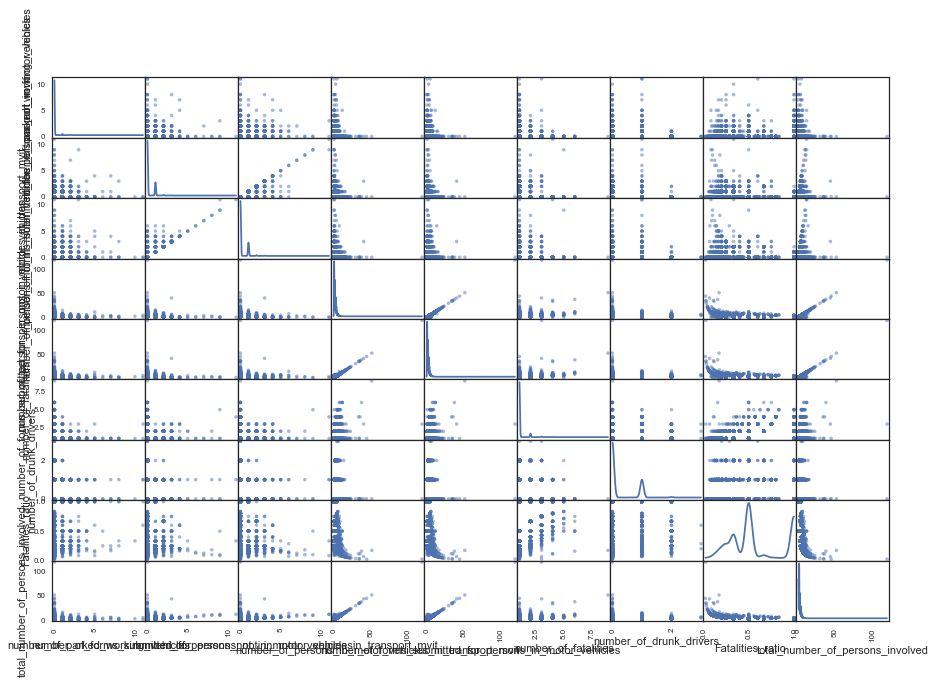

In [75]:
from pandas.tools.plotting import scatter_matrix

ax = scatter_matrix(filteredAcc,figsize=(15, 10),diagonal='kde')


In [104]:
#Accident_forScatter.transpose()
# Aggregating the data for the correlation between the atmospheric conditions and the number of fatalities

#plt.hist(Accident_forScatter.number_of_fatalities, bins=30, histtype='stepfilled')

GroupAccidentByStateAtmos= filteredAcc.groupby(['state_name','atmospheric_conditions_name'] )


GroupAccidentResult=GroupAccidentByStateAtmos.aggregate({'number_of_fatalities':'sum',
                                                         'number_of_drunk_drivers':'count',
                                                          'Fatalities_ratio':'mean',
                                                          'total_number_of_persons_involved':'sum'})

GroupAccidentResult.rename(columns={'number_of_drunk_drivers': 'accident_count'}, inplace=True)
#GroupAccidentResult.reset_index()
#GroupAccidentResult

At the state and atmospheric conditions, in average 60 % of all the people involved in an accident die due to it.

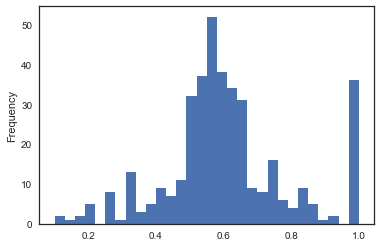

In [98]:
#grouped histogram per State and Atmospheric conditions
GroupAccidentResult.Fatalities_ratio.plot.hist(bins=30, histtype='stepfilled')

One of the relation between attributes on the state level was to understand if a an accdient resulted in at least one fatality.

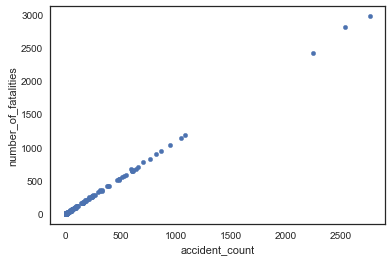

In [99]:
GroupAccidentResult.plot.scatter(x='accident_count',y='number_of_fatalities')

If a simple linear regretion is fit. This tell us that for every accident that append in a state, there will be 1.08 fatalities. This is because there instances that the accident may have more than one death associated to it.

Model Slope:  1.0868902876958688
Model Intercept:  0.20373261393852715


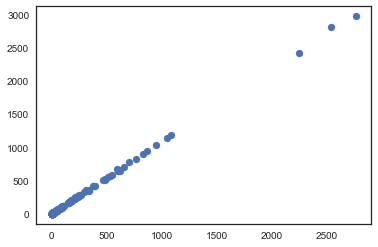

In [103]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
x=GroupAccidentResult.accident_count
y=GroupAccidentResult.number_of_fatalities
model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);
print("Model Slope: ", model.coef_[0])
print("Model Intercept: ", model.intercept_)

## Explore Attributes and Class

The class of interest is the atmospheric conditions and their effect on the number of fatalities, the fatality ratio, and the number of people involed in the accident. It was found that there is no much effect on the fatalities ratio when it comes to the atmospheric condition. However, it can be seen that the number of fatalities can see a separation due to this weather condition. The same can be said for the total number of persons involved in an accident.

D:\Masters\Anaconda\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.
  import sys


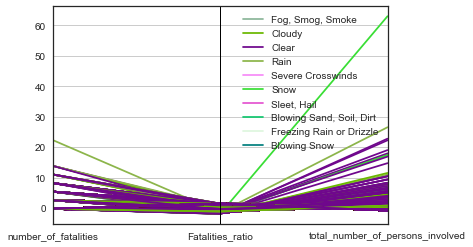

In [77]:
from pandas.tools.plotting import parallel_coordinates
acc_sub = filteredAcc[['number_of_fatalities','Fatalities_ratio','total_number_of_persons_involved']]

acc_sub_normalized = (acc_sub-acc_sub.mean())/(acc_sub.std())
acc_sub_normalized['atmospheric_conditions_name']=filteredAcc.atmospheric_conditions_name

parallel_coordinates(acc_sub_normalized, 'atmospheric_conditions_name')


## New Features

The 'Day_Time_Yes_No' field was added to the dataframe to reduce the dimensions  to help visualize the impact of atmospheric condition. This could also be used as a control variable in future predication. 

In [ ]:


Accident_df['Fatalities_ratio'] = Accident_df.number_of_fatalities/(Accident_df.number_of_persons_not_in_motor_vehicles_in_transport_mvit + Accident_df.number_of_persons_in_motor_vehicles_in_transport_mvit)



## Exceptional Work